In [1]:
%matplotlib inline
import os
import math
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table, Column, vstack, join
from astropy import coordinates as coords
from astropy import units as u
from astroquery.vizier import Vizier

ModuleNotFoundError: No module named 'astroquery'

In [75]:
Vizier.TIMEOUT = 100000
Vizier.ROW_LIMIT = -1


l0,b0 = 50.972,0.078
wid = hei = 57.75*u.arcmin

coor0 = coords.SkyCoord(l0, b0, frame = 'galactic',
                       unit = (u.deg,u.deg))


glmPSC = Vizier.query_region(coor0.galactic, width = wid, height = hei, 
                             catalog = 'II/293/glimpse')[0]


mipsPSC = Vizier.query_region(coor0.galactic, width = wid, height = hei, 
                             catalog = 'mipsgal')[0]
mipsPSC = mipsPSC['MIPSGAL', 'S24', 'e_S24', '__24_', 'e__24_',  'GLIMPSE']

In [76]:
glmPSC = glmPSC[glmPSC['Glon'] > 50.492]
glmPSC = glmPSC[glmPSC['Glon'] < 51.452]
glmPSC = glmPSC[glmPSC['Glat'] > -0.402]
glmPSC = glmPSC[glmPSC['Glat'] <  0.558]
glmPSC = glmPSC['GLIMPSE', 'Glon', 'Glat', 
                'RAJ2000', 'DEJ2000','csf',  
                '_3.6mag', 'e_3.6mag', '_4.5mag', 'e_4.5mag',  
                '_5.8mag', 'e_5.8mag',  '_8.0mag', 'e_8.0mag', 
                'F_3.6_', 'e_F_3.6_', 'F_4.5_', 
                'e_F_4.5_', 'F_5.8_', 'e_F_5.8_', 'F_8.0_', 'e_F_8.0_']

In [77]:
spitzerPSC = join(glmPSC, mipsPSC, keys = 'GLIMPSE',
                 join_type = 'left')

In [78]:
spitzerPSC['_3.6mag'].mask[spitzerPSC['e_3.6mag']>=0.2]=True
spitzerPSC['_4.5mag'].mask[spitzerPSC['e_4.5mag']>=0.2]=True
spitzerPSC['_5.8mag'].mask[spitzerPSC['e_5.8mag']>=0.2]=True
spitzerPSC['_8.0mag'].mask[spitzerPSC['e_8.0mag']>=0.2]=True
spitzerPSC['__24_'].mask[spitzerPSC['e__24_']>=0.2]=True
spitzerPSC['e_3.6mag'].mask[spitzerPSC['e_3.6mag']>=0.2]=True
spitzerPSC['e_4.5mag'].mask[spitzerPSC['e_4.5mag']>=0.2]=True
spitzerPSC['e_5.8mag'].mask[spitzerPSC['e_5.8mag']>=0.2]=True
spitzerPSC['e_8.0mag'].mask[spitzerPSC['e_8.0mag']>=0.2]=True
spitzerPSC['e__24_'].mask[spitzerPSC['e__24_']>=0.2]=True
# spitzerPSC['Jmag'].mask[spitzerPSC['e_Jmag']>=0.1]=True
# spitzerPSC['Hmag'].mask[spitzerPSC['e_Hmag']>=0.1]=True
# spitzerPSC['Kmag'].mask[spitzerPSC['e_Kmag']>=0.1]=True
# spitzerPSC['e_Jmag'].mask[spitzerPSC['e_Jmag']>=0.1]=True
# spitzerPSC['e_Hmag'].mask[spitzerPSC['e_Hmag']>=0.1]=True
# spitzerPSC['e_Kmag'].mask[spitzerPSC['e_Kmag']>=0.1]=True

/Users/wuyingtianhua/anaconda/lib/python3.5/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, oper)(other)


In [79]:
AJ = 0.282
AH = 0.175
AK = 0.112
AI1 = 0.632*AK
AI2 = 0.53*AK
AI3 = 0.49*AK
AI4 = 0.49*AK
AM1 = 0.48*AK

In [80]:
c_36_45 = spitzerPSC['_3.6mag'] - spitzerPSC['_4.5mag']
c_36_58 = spitzerPSC['_3.6mag'] - spitzerPSC['_5.8mag']
c_36_80 = spitzerPSC['_3.6mag'] - spitzerPSC['_8.0mag']
c_45_58 = spitzerPSC['_4.5mag'] - spitzerPSC['_5.8mag']
c_45_80 = spitzerPSC['_4.5mag'] - spitzerPSC['_8.0mag']
c_58_80 = spitzerPSC['_5.8mag'] - spitzerPSC['_8.0mag']
# c_J_H   = spitzerPSC['Jmag'] - spitzerPSC['Hmag'] 
# c_J_K   = spitzerPSC['Jmag'] - spitzerPSC['Kmag']
# c_H_K   = spitzerPSC['Hmag'] - spitzerPSC['Kmag']
# c_K_36  = spitzerPSC['Kmag'] - spitzerPSC['_3.6mag']
c_36_24 = spitzerPSC['_3.6mag'] - spitzerPSC['__24_']
c_45_24 = spitzerPSC['_4.5mag'] - spitzerPSC['__24_']
c_58_24 = spitzerPSC['_5.8mag'] - spitzerPSC['__24_']
c_80_24 = spitzerPSC['_8.0mag'] - spitzerPSC['__24_']
c_36_45.name = 'c_36_45'
c_36_58.name = 'c_36_58'
c_36_80.name = 'c_36_80'
c_45_58.name = 'c_45_58'
c_45_80.name = 'c_45_80'
c_58_80.name = 'c_58_80'
# c_J_H.name = 'c_J_H'
# c_J_K.name = 'c_J_K'
# c_H_K.name = 'c_H_K'
# c_K_36.name = 'c_K_36 '
c_36_24.name = 'c_36_24'
c_45_24.name = 'c_45_24'
c_58_24.name = 'c_58_24'
c_80_24.name = 'c_80_24'

In [81]:
A = (AJ-AH)/(AH-AK)
B = (AI1-AI2)/(AH-AK)
C = (AK-AI1)/(AH-AK)
# c_H_K0 = (c_J_H-A*c_H_K-0.52)/(0.58-A)

# c_H_K0[spitzerPSC['Jmag'].mask]=(1.33*(B*c_H_K[spitzerPSC['Jmag'].mask]-
#                                 c_36_45[spitzerPSC['Jmag'].mask])-0.133)/(1.33*B-1)
# c_H_K0.name = 'c_H_K0'
# c_K_36_0 = c_K_36-(c_H_K-c_H_K0)*C
# c_K_36_0.name = 'c_K_36_0'
# c_36_45_0 = c_36_45-(c_H_K-c_H_K0)*B
# c_36_45_0.name = 'c_36_45_0'
# m36_0 = spitzerPSC['_3.6mag']-(c_H_K-c_H_K0)*AI1/(AH-AK)
# m36_0.name = 'm36_0'

In [82]:
sig_I1_I2 = np.sqrt(spitzerPSC['e_3.6mag']**2+spitzerPSC['e_4.5mag']**2)

sig_I1_I2.name = 'sig_I1_I2'
sig_I2_I3 = np.sqrt(spitzerPSC['e_4.5mag']**2+ spitzerPSC['e_5.8mag']**2)

sig_I2_I3.name = 'sig_I2_I3'
sig_I2_I4 = np.sqrt(spitzerPSC['e_4.5mag']**2+spitzerPSC['e_8.0mag']**2)

sig_I2_I4.name = 'sig_I2_I4'
sig_I1_I3 = np.sqrt(spitzerPSC['e_3.6mag']**2+spitzerPSC['e_5.8mag']**2)

sig_I1_I3.name = 'sig_I1_I3'
# sig_ks_I1 =  np.sqrt(spitzerPSC['e_3.6mag']**2+spitzerPSC['e_Kmag']**2)

# sig_ks_I1.name = 'sig_ks_I1'
sig_I3_I4 =  np.sqrt(spitzerPSC['e_5.8mag']**2+spitzerPSC['e_8.0mag']**2)

sig_I3_I4.name = 'sig_I3_I4'

In [83]:
yso_type = []
for isour in range(len(spitzerPSC)):
    if (spitzerPSC['__24_'][isour] < 7 and
        c_36_58[isour] > 0.5 and 
        c_45_24[isour] > 4.5 and 
        c_80_24[isour] > 4.0):
        yso_type.append('ClassI')
        
    elif (c_45_58[isour] < (1.05/1.2)*(c_58_80[isour]-1) and 
        c_45_58[isour] < 1.05 and
        c_58_80[isour] > 1 and
        spitzerPSC['_4.5mag'][isour] > 11.5):
        yso_type.append('PAH_GAL')
        
    elif (c_36_58[isour] < (1.5/2)*(c_45_80[isour]-1) and 
          c_36_58[isour] < 1.5 and
          c_45_80[isour] > 1 and
          spitzerPSC['_4.5mag'][isour] > 11.5):
        yso_type.append('PAH_GAL')
        
    elif (c_45_80[isour] > 0.5 and
         spitzerPSC['_4.5mag'][isour] > 13.5+(c_45_80[isour]-2.3)/0.4 and 
         spitzerPSC['_4.5mag'][isour] > 13.5 and 
         (spitzerPSC['_4.5mag'][isour] > 14.5-(c_45_80[isour]-1.2)/0.3) or
         spitzerPSC['_4.5mag'][isour]>14+(c_45_80[isour]-0.5) or 
         spitzerPSC['_4.5mag'][isour] > 14.5):
        yso_type.append('AGN_GAL')
    
    elif (c_36_45[isour] > (1.2/0.55)*(c_45_58[isour]-0.3)+0.8 and
         c_45_58[isour] <= 0.85 and 
         c_36_45[isour] > 1.05):
        yso_type.append('Shock_Knots')
        
    elif (c_36_45[isour] - sig_I1_I2[isour] <= 1.4*(c_45_58[isour]+sig_I2_I3[isour] - 0.7)+0.15 and
         c_36_45[isour] - sig_I1_I2[isour] <= 1.65):
        yso_type.append('PAH_Knots')
        
    elif (c_58_80.mask[isour] == False and 
        c_45_58[isour] > 0.7 and 
        c_36_45[isour] > 0.7):
        yso_type.append('ClassI')
        
    elif (c_58_80.mask[isour] == False and 
        c_45_80[isour] - sig_I2_I4[isour] > 0.5 and 
         c_36_58[isour] - sig_I1_I3[isour] > 0.35 and 
         c_36_58[isour]+sig_I1_I3[isour] <= 0.14/0.04*(c_45_80[isour] - sig_I2_I4[isour]-0.5)+0.5 and
         c_36_45[isour]-sig_I1_I2[isour] > 0.15):
        yso_type.append('ClassII')
        
#     elif (c_58_80.mask[isour] == True and 
#          c_36_45_0[isour] - sig_I1_I2[isour] > 0.101 and 
#          c_K_36_0[isour] - sig_ks_I1[isour] > 0 and 
#          c_K_36_0[isour] - sig_ks_I1[isour] > -2.85714*(c_36_45_0[isour] - sig_I1_I2[isour]-0.101)+0.5 and 
#          c_K_36_0[isour] - sig_ks_I1[isour] > -2.85714*(c_36_45_0[isour] - sig_I1_I2[isour]-0.401)+1.7 and
#          m36_0[isour] < 15):
#         yso_type.append('ClassI')
                
    elif (spitzerPSC['__24_'][isour] < 7.0 and 
         ((c_36_24[isour] > 4.5 and c_58_24.mask[isour] and c_45_24.mask[isour] and c_80_24.mask[isour]) or 
         (c_45_24[isour] > 4.5 and c_58_24.mask[isour] and c_80_24.mask[isour]) or 
         (c_58_24[isour] > 4.5 and c_80_24.mask[isour]) or 
         (c_80_24[isour] > 4.5))):
        yso_type.append('ClassI')
        
    elif (c_58_24[isour] > 2.5 or 
         c_45_24[isour] > 2.5):
        yso_type.append('TD')

    else :
        yso_type.append('Field')
    
    

for isour in range(len(spitzerPSC)):
    if (yso_type[isour] == 'ClassI' and
        c_58_24[isour] < 4):
        yso_type[isour] = 'ClassII'
    
    elif (yso_type[isour] == 'ClassI' and 
         c_58_24.mask[isour] == True and
         c_45_24[isour] < 4):
        yso_type[isour] = 'ClassII'

In [84]:
yso_type = Column(yso_type, name = 'yso_type')

spitzerPSC.add_column(yso_type)


keysOld = ['_3.6mag', 'e_3.6mag', '_4.5mag', 'e_4.5mag', '_5.8mag', 
           'e_5.8mag', '_8.0mag', 'e_8.0mag', 'F_3.6_', 'e_F_3.6_', 
           'F_4.5_', 'e_F_4.5_', 'F_5.8_', 'e_F_5.8_', 'F_8.0_', 
           'e_F_8.0_','__24_', 'e__24_']
keysNew = ['_3_6mag', 'e_3_6mag', '_4_5mag', 'e_4_5mag', '_5_8mag', 
           'e_5_8mag', '_8_0mag', 'e_8_0mag', 'F_3_6_', 'e_F_3_6_', 
           'F_4_5_', 'e_F_4_5_', 'F_5_8_', 'e_F_5_8_', 'F_8_0_', 
           'e_F_8_0_','_24mag', 'e_24mag']
for ikey in range(len(keysOld)):
    spitzerPSC[keysOld[ikey]].name = keysNew[ikey]

ysoCat = spitzerPSC[spitzerPSC['yso_type'] != 'Field']
ysoCat = ysoCat[ysoCat['yso_type'] != 'PAH_Knots']
ysoCat = ysoCat[ysoCat['yso_type'] != 'Shock_Knots']
ysoCat = ysoCat[ysoCat['yso_type'] != 'PAH_GAL']
ysoCat = ysoCat[ysoCat['yso_type'] != 'AGN_GAL']
ysoCat = ysoCat[ysoCat['yso_type'] != 'others']

yso1 = ysoCat[ysoCat['yso_type'] != 'ClassII']
yso1 = yso1[yso1['yso_type'] != 'TD']

yso2 = ysoCat[ysoCat['yso_type'] != 'ClassI']
yso2 = yso2[yso2['yso_type'] != 'TD']

agnGAL = spitzerPSC[spitzerPSC['yso_type'] == 'AGN_GAL']
PAH_GAL = spitzerPSC[spitzerPSC['yso_type'] == 'PAH_GAL']
Shock_Knots = spitzerPSC[spitzerPSC['yso_type'] == 'Shock_Knots']
PAH_Knots = spitzerPSC[spitzerPSC['yso_type'] == 'PAH_Knots']
classI = spitzerPSC[spitzerPSC['yso_type'] == 'ClassI']
classII = spitzerPSC[spitzerPSC['yso_type'] == 'ClassII']
TD = spitzerPSC[spitzerPSC['yso_type'] == 'TD']
field = spitzerPSC[spitzerPSC['yso_type'] == 'Field']

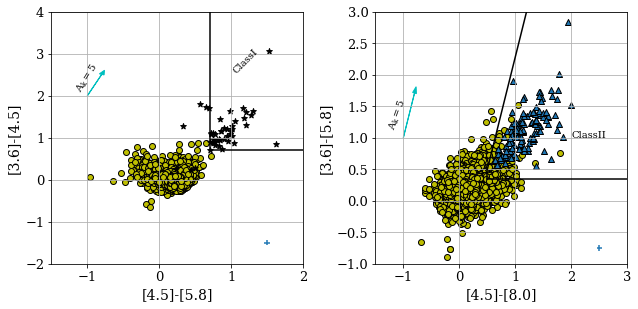

In [85]:
fig=plt.figure(figsize = (10,5))


AK = 5

A36 = 0.632*AK
A45 = 0.53*AK
A58 = 0.49*AK
A80 = 0.49*AK
AM1 = 0.48*AK

field_IRAC = field[field['_8_0mag'].mask == False]
ax1=fig.add_axes([0.1,0.1,0.35,0.7])
ax2=fig.add_axes([0.55,0.1,0.35,0.7])
# ax3=fig.add_axes([0.7,0.1,0.2,0.8])

ax1.scatter(field_IRAC['_4_5mag']-field_IRAC['_5_8mag'],
    field_IRAC['_3_6mag']-field_IRAC['_4_5mag'],c='y',edgecolor='black')
ax1.scatter(classI['_4_5mag']-classI['_5_8mag'],
    classI['_3_6mag']-classI['_4_5mag'],marker="*",c = 'k')

ax1.arrow(-1.0,2,A45-A58,A36-A45, width = 0.004, head_width = 0.07, 
          color='c')
ax1.text(-1.2,2.6,r'$A_k=5$',rotation=58)
ax1.text(1,3,r'ClassI',rotation=45)
ax1.set_xlabel('[4.5]-[5.8]', fontsize = 14)
ax1.set_ylabel('[3.6]-[4.5]', fontsize = 14)
ax1.grid(True)
ax1.plot([0.7,0.7],[0.7,4],c='k')
ax1.plot([2,0.7],[0.7,0.7],c='k')
ax1.set_xlim([-1.5,2])
ax1.set_ylim([-2,4])
ax1.errorbar(1.5, -1.5, yerr = 0.055, xerr = 0.043)

ax2.scatter(field_IRAC['_4_5mag']-field_IRAC['_8_0mag'],
    field_IRAC['_3_6mag']-field_IRAC['_5_8mag'],c='y', edgecolor='black')
ax2.scatter(classII['_4_5mag']-classII['_8_0mag'],
     classII['_3_6mag']-classII['_5_8mag'],marker="^",edgecolor='black')

ax2.arrow(-1,1,A45-A80,A36-A58, width = 0.004, head_width = 0.07,
          color='c')
ax2.text(-1.3,1.5,r'$A_k=5$',rotation=70)
ax2.text(2,1,r'ClassII')
ax2.set_xlabel('[4.5]-[8.0]', fontsize = 14)
ax2.set_ylabel('[3.6]-[5.8]', fontsize = 14)
ax2.grid(True)
ax2.plot([0.5,0.5],[0.5,0.35],c='k')
ax2.plot([0.5,1.2],[0.5,3],c='k')
ax2.plot([0.5,3],[0.35,0.35],c='k')
ax2.set_xlim([-1.5,3])
ax2.set_ylim([-1,3])
ax2.errorbar(2.5, -0.75, yerr = 0.052, xerr = 0.043)

# ax3.scatter(field_IRAC['_3_6mag']-field_IRAC['_4_5mag'],
#             field_IRAC['Kmag']-field_IRAC['_3_6mag'],c='y')
# ax3.scatter(classI['_3_6mag']-classI['_4_5mag'],
#             classI['Kmag']-classI['_3_6mag'],marker="*")
# ax3.scatter(classII['_3_6mag']-classII['_4_5mag'],
#     classII['Kmag']-classII['_3_6mag'], marker="^")

# ax3.arrow(-1,1,A36-A45,AK-A36, width = 0.004, 
#           color='c')
# ax3.text(-1.3,1.5,r'$A_k=5$',rotation=70)
# ax3.text(0.5,0,r'ClassII')
# ax3.text(1.5,1,r'ClassI')
# ax3.set_xlabel('$[[3.6]-[4.5]]_0$')
# ax3.set_ylabel('$[K-[3.6]]_0$')
# ax3.grid(True)
# ax3.plot([0.101,0.101],[0.5,4],c='k')
# ax3.plot([0.101,0.28],[0.5,0],c='k')
# ax3.plot([0.28,3],[0,0],c='k')
# ax3.plot([0.101,0.996],[2.557142,0],c='k')
# ax3.set_xlim([-1.5,2])
# ax3.set_ylim([-1,4])

fig.savefig('ClassI_ClassII.pdf')

In [25]:
print('There are', len(agnGAL), 'broad-line AGNe,', len(PAH_GAL), 'PAH galaxies,',
     len(Shock_Knots), 'unresolved knots of shock emission, and', 
     len(PAH_Knots), 'objects that suffer from structured PAH aperture contamination.')

print(len(ysoCat), 'YSOs have been identified including', 
      len(classI), 'Class I,', len(classII), 'ClassII, and',
     len(TD), 'transition disks.')


There are 648 broad-line AGNe, 4 PAH galaxies, 6 unresolved knots of shock emission, and 2864 objects that suffer from structured PAH aperture contamination.
228 YSOs have been identified including 55 Class I, 127 ClassII, and 46 transition disks.


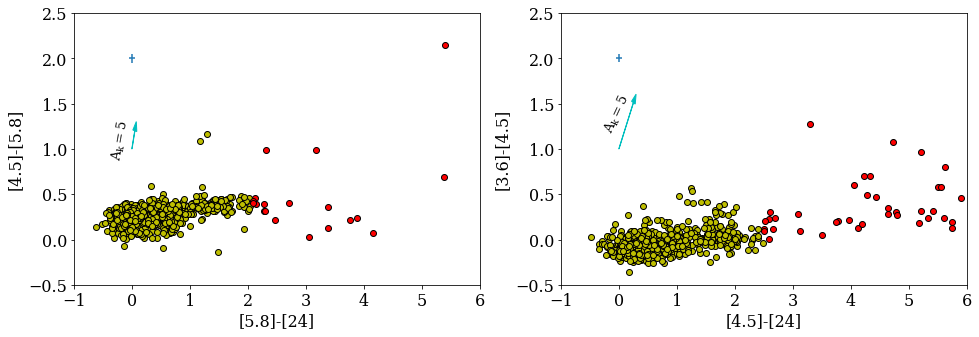

In [88]:
fig1=plt.figure(figsize = (16,5))

field_IRAC = field[field['_8_0mag'].mask == False]

ax4=fig1.add_subplot(1,2,1)
ax5=fig1.add_subplot(1,2,2)

ax4.scatter(field_IRAC['_5_8mag']-field_IRAC['_24mag'],
    field_IRAC['_4_5mag']-field_IRAC['_5_8mag'],c='y',edgecolor='black')
ax4.scatter(TD['_5_8mag']-TD['_24mag'],
    TD['_4_5mag']-TD['_5_8mag'],c='r',edgecolor='black')

ax4.arrow(0,1,A58-AM1,A45-A58, width = 0.004, head_width = 0.07, 
          color='c')
ax4.text(-0.4,1.2,r'$A_k=5$',rotation=80,fontsize = 13)
ax4.set_xlabel('[5.8]-[24]',fontsize = 16)
ax4.set_ylabel('[4.5]-[5.8]',fontsize = 16)
ax4.set_xlim([-1,6])
ax4.set_ylim([-0.5,2.5])
ax4.errorbar(0, 2, xerr = 0.051, yerr = 0.052)


ax5.scatter(field_IRAC['_4_5mag']-field_IRAC['_24mag'],
    field_IRAC['_3_6mag']-field_IRAC['_4_5mag'],c='y',edgecolor='black')
ax5.scatter(TD['_4_5mag']-TD['_24mag'],
    TD['_3_6mag']-TD['_4_5mag'],c='r',edgecolor='black')

ax5.arrow(0,1,A45-AM1,A36-A45, width = 0.004, head_width = 0.07,
          color='c')
ax5.text(-0.3,1.5,r'$A_k=5$',rotation=65,fontsize = 13)
ax5.set_xlabel('[4.5]-[24]',fontsize = 16)
ax5.set_ylabel('[3.6]-[4.5]',fontsize = 16)
ax5.set_xlim([-1,6])
ax5.set_ylim([-0.5,2.5])
ax5.errorbar(0, 2, xerr = 0.050, yerr = 0.045)

mpl.rc('xtick', labelsize = 16)
mpl.rc('ytick', labelsize = 16)

fig1.savefig('cTD.pdf')

In [36]:
import aplpy as ap
from astropy.io import fits
yso1.write('yso1.txt',format = 'ipac')
yso2.write('yso2.txt',format = 'ipac')

indat = ascii.read('yso1.txt')
indat1 = ascii.read('yso2.txt')

newtbl = Table([indat['RAJ2000'],indat['DEJ2000']])
newtbl1 = Table([indat1['RAJ2000'],indat1['DEJ2000']])

newtbl.write('yso1_coor.txt',format='ascii.fixed_width_no_header',delimiter=None)
newtbl1.write('yso2_coor.txt',format='ascii.fixed_width_no_header',delimiter=None)

# hdulist = fits.open('N107_N.fits')
# fb = ap.FITSFigure(hdulist)

# data1=np.loadtxt('yso1_coor.txt')
# data2=np.loadtxt('yso2_coor.txt')

# ra,dec = data1[:,0],data1[:,1]
# fb.show_markers(ra,dec,layer='scatter_set_1',edgecolor='black',
#                 facecolor='black',marker='*',s=50)

# ra1,dec1 = data2[:,0],data2[:,1]
# fb.show_markers(ra1,dec1,layer='scatter_set_2',edgecolor='b',
#                 facecolor='b',marker='^',s=50)


# fb.show_colorscale(cmap = 'viridis')
# # fb.show_contour('N107_N.fits',levels=4,colors = 'white')

# fb.save('projection.pdf')

In [45]:
ysov1 = yso1['e_3_6mag', 'e_4_5mag', 'e_5_8mag', 'e_8_0mag']
ysov1.write('yso1v1.txt',format = 'ipac')
ysov2 = yso2['e_3_6mag', 'e_4_5mag', 'e_5_8mag', 'e_8_0mag']
ysov2.write('yso2v1.txt',format = 'ipac')

In [50]:
yso1v1 = ascii.read('yso1v1.txt')
yso2v2 = ascii.read('yso2v1.txt')

In [55]:
i1 = 0
i2 = 0
i3 = 0
i4 = 0

for i in range(45):
    i1 += np.sqrt(yso1v1['e_3_6mag'][i]**2 + yso1v1['e_4_5mag'][i]**2)
    i2 += np.sqrt(yso1v1['e_4_5mag'][i]**2 + yso1v1['e_5_8mag'][i]**2)
    
for k in range(127):
    i3 += np.sqrt(yso2v2['e_3_6mag'][i]**2 + yso2v2['e_5_8mag'][i]**2)
    i4 += np.sqrt(yso2v2['e_4_5mag'][i]**2 + yso2v2['e_8_0mag'][i]**2)

i1 = i1/45
i2 = i2/45
i3 = i3/len(yso2v2)
i4 = i4/len(yso2v2)
    
print(i1, i2, i3, i4)

0.113379412492 0.11582627228 0.105209315177 0.0867698104181


/Users/wuyingtianhua/anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


In [12]:
yso1 = ysoCat[ysoCat['yso_type'] != 'ClassII']
yso1 = yso1[yso1['yso_type'] != 'TD']

yso2 = ysoCat[ysoCat['yso_type'] != 'ClassI']
yso2 = yso2[yso2['yso_type'] != 'TD']

In [12]:
yso1.write('yso1.txt',format = 'ipac')
yso2.write('yso2.txt',format = 'ipac')

In [37]:
fb.show_contour?

In [57]:
fb.show_colorscale?

In [43]:
Vizier.query_region?

In [61]:
TD

GLIMPSE,Glon,Glat,RAJ2000,DEJ2000,csf,_3_6mag,e_3_6mag,_4_5mag,e_4_5mag,_5_8mag,e_5_8mag,_8_0mag,e_8_0mag,F_3_6_,e_F_3_6_,F_4_5_,e_F_4_5_,F_5_8_,e_F_5_8_,F_8_0_,e_F_8_0_,MIPSGAL,S24,e_S24,_24mag,e_24mag,yso_type
,deg,deg,deg,deg,,mag,mag,mag,mag,mag,mag,mag,mag,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,,mJy,mJy,mag,mag,
bytes17,float64,float64,float64,float64,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes18,float64,float32,float32,float32,str11
G050.5020+00.0432,50.502021,0.043231,291.035800,15.605177,0,--,--,13.737,0.165,--,--,--,--,0.38,0.0764,0.575,0.0872,--,--,--,--,MG050.5021+00.0435,3.213,0.314,8.39,0.11,TD
G050.5203+00.0664,50.520379,0.066436,291.023593,15.632330,0,12.572,0.061,11.876,0.101,11.803,0.141,11.460,0.065,2.63,0.147,3.19,0.296,2.19,0.283,1.67,0.101,MG050.5204+00.0666,6.337,0.360,7.65,0.06,TD
G050.5291-00.0658,50.529159,-0.065875,291.148912,15.577424,0,12.269,0.072,11.987,0.085,11.960,0.103,11.399,0.084,3.48,0.232,2.88,0.225,1.89,0.179,1.77,0.137,MG050.5291-00.0657,2.005,0.220,8.90,0.12,TD
G050.5912-00.1724,50.591261,-0.172486,291.276926,15.581578,0,--,--,3.318,0.115,--,--,--,--,--,--,8.46e+03,893,--,--,--,--,MG050.5912-00.1724,3765.515,69.366,0.72,0.02,TD
G050.6159-00.0497,50.615896,-0.049736,291.176822,15.661455,0,12.425,0.054,12.378,0.090,12.249,0.161,12.032,0.167,3.01,0.149,2.01,0.167,1.45,0.215,0.987,0.152,MG050.6157-00.0495,2.077,0.303,8.87,0.16,TD
G050.6466-00.1461,50.646634,-0.146136,291.280103,15.642824,0,13.589,0.082,13.284,0.102,--,--,--,--,1.03,0.0777,0.873,0.082,--,--,--,--,MG050.6462-00.1458,2.903,0.289,8.50,0.11,TD
G050.6548-00.2265,50.654837,-0.226578,291.357677,15.611884,0,12.923,0.064,12.638,0.100,--,--,--,--,1.9,0.112,1.58,0.145,--,--,1.5,0.282,MG050.6549-00.2263,4.640,0.397,7.99,0.09,TD
G050.6589+00.1636,50.658940,0.163619,291.002753,15.800381,0,9.457,0.098,9.364,0.076,8.957,0.038,8.366,0.031,46.3,4.2,32.3,2.26,30.1,1.06,28.9,0.815,MG050.6590+00.1638,23.365,0.640,6.24,0.03,TD


In [63]:
TD = TD['e_3_6mag', 'e_4_5mag', 'e_5_8mag', 'e_24mag']
TD.write('TD.txt',format = 'ipac')

In [68]:
TD_v1 = ascii.read('TD.txt')
print(TD_v1)

e_3_6mag e_4_5mag e_5_8mag e_24mag
  mag      mag      mag      mag  
-------- -------- -------- -------
   0.061    0.101    0.141    0.06
   0.072    0.085    0.103    0.12
   0.054     0.09    0.161    0.16
   0.098    0.076    0.038    0.03
   0.065      0.1     0.16     0.1
   0.037    0.074    0.034    0.02
    0.06    0.045    0.033    0.02
   0.038    0.062    0.048    0.05
   0.056    0.058    0.043    0.02
   0.039    0.042    0.032    0.02
   0.077    0.105    0.152    0.09
   0.045    0.066    0.079    0.13
   0.047    0.048    0.027    0.02
   0.035    0.062    0.044    0.07
   0.035    0.047    0.033    0.09
   0.054    0.047    0.058    0.06


In [70]:
i5 = 0
i6 = 0
i7 = 0
i8 = 0

for i in range(len(TD_v1)):
    i5 += np.sqrt(TD_v1['e_5_8mag'][i]**2 + TD_v1['e_24mag'][i]**2)
    i6 += np.sqrt(TD_v1['e_4_5mag'][i]**2 + TD_v1['e_5_8mag'][i]**2)
    i7 += np.sqrt(TD_v1['e_4_5mag'][i]**2 + TD_v1['e_24mag'][i]**2)
    i8 += np.sqrt(TD_v1['e_3_6mag'][i]**2 + TD_v1['e_4_5mag'][i]**2)
    
i5 = i5/len(TD_v1)
i6 = i6/len(TD_v1)
i7 = i7/len(TD_v1)
i8 = i8/len(TD_v1)

print(i5/2, i6/2, i7/2, i8/2)

0.0510099143123 0.0517686753798 0.0497500503007 0.0445210512985
